In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Siamese/Identification'

/content/drive/My Drive/Siamese/Identification


In [3]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')

In [4]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 2.8MB/s 


In [5]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [6]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 10

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [7]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 20

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  258


In [8]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [9]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(10)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=3)

Encoder loaded


*** Epoch  0  ***
*** Train ***


1876it [03:45,  8.33it/s]

accuracy mean  0.3843283582089552 topk 0.5501066098081023  min  0.5708955223880597
Error  0.44989339019189767
{270: 13, 272: 58, 273: 53, 274: 12, 275: 75, 276: 47, 277: 87, 278: 22, 271: 37, 279: 92, 280: 92, 281: 69, 282: 32, 283: 43, 285: 86, 284: 50, 286: 10, 287: 86, 288: 38, 289: 5}
*** Test ***



258it [00:30,  8.56it/s]


accuracy final_mean  0.8643410852713178  final_min  0.8682170542635659


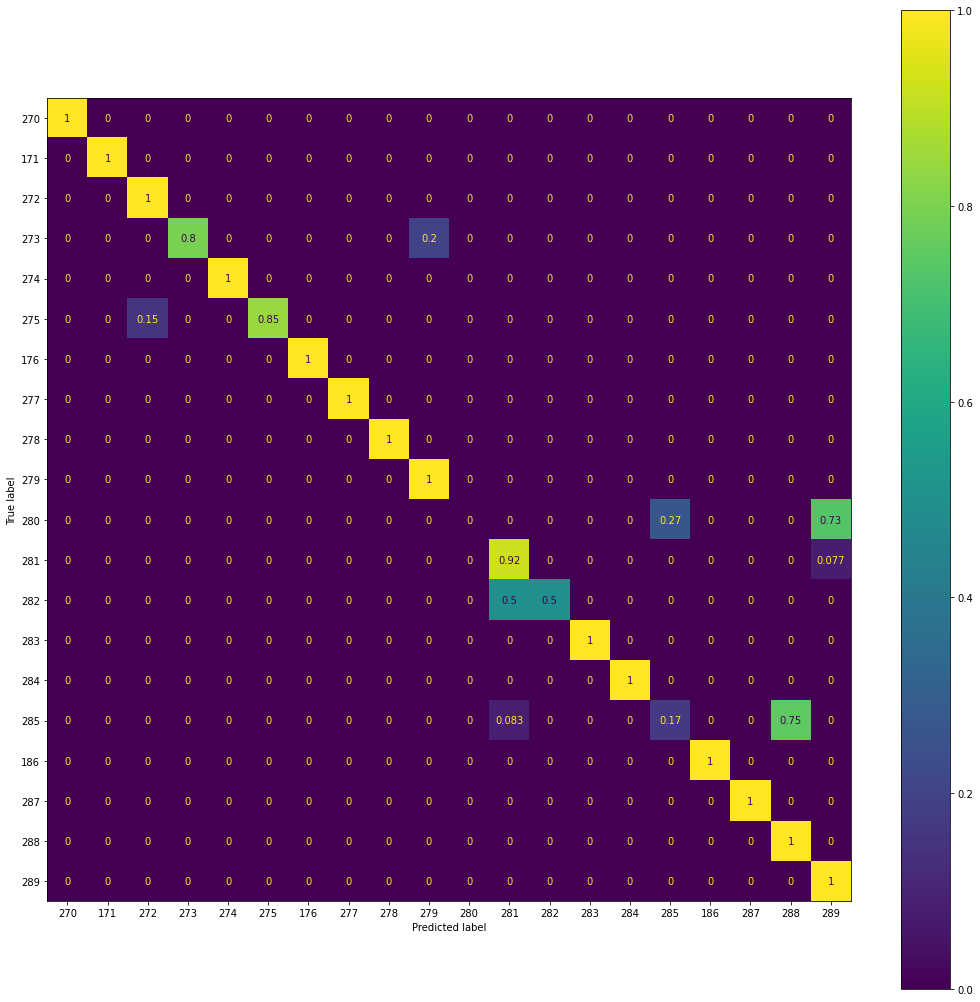

*** Epoch  1  ***
*** Train ***


1876it [00:30, 61.80it/s]

accuracy mean  0.6114072494669509 topk 0.6556503198294243  min  0.6321961620469083
Error  0.3443496801705757
{270: 16, 272: 48, 273: 40, 274: 10, 275: 19, 276: 51, 277: 74, 278: 14, 271: 24, 279: 90, 280: 42, 281: 70, 282: 27, 283: 34, 285: 46, 284: 16, 286: 6, 287: 89, 288: 38, 289: 6}
*** Test ***



258it [00:03, 78.98it/s]


accuracy final_mean  0.9147286821705426  final_min  0.8914728682170543


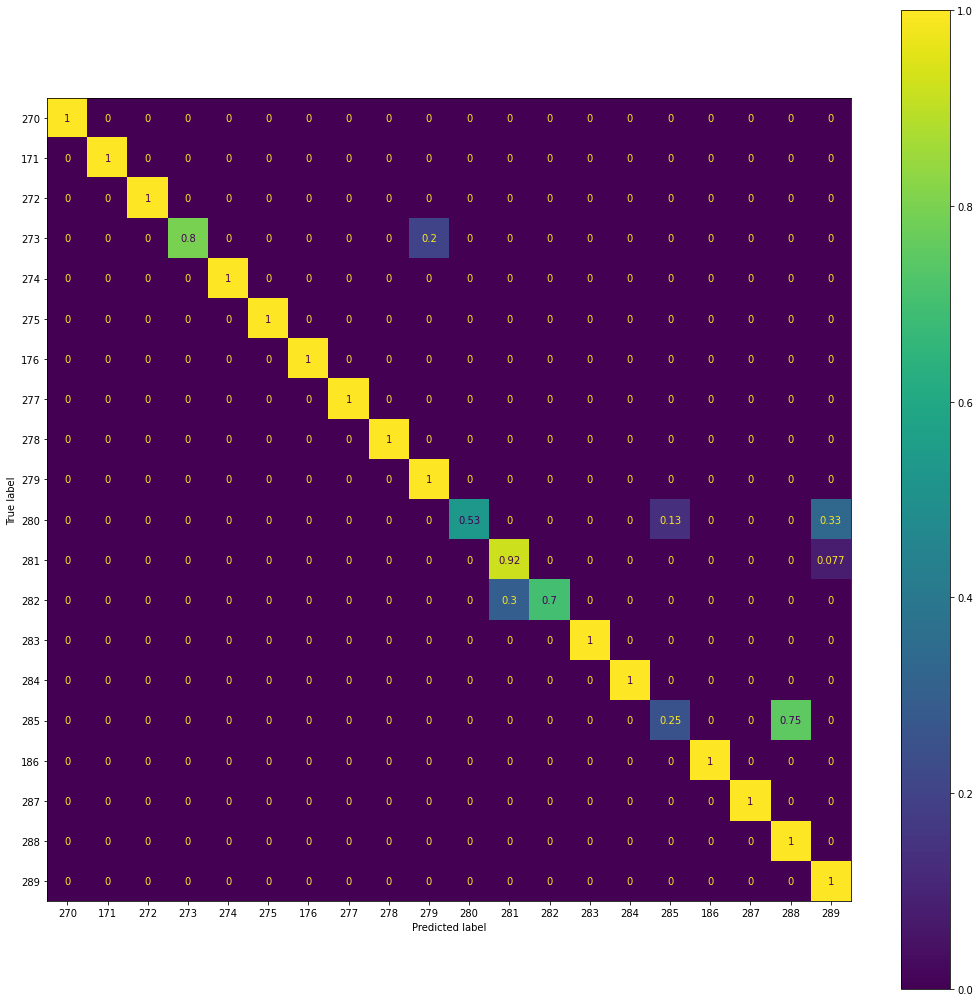

*** Epoch  2  ***
*** Train ***


1876it [00:30, 61.96it/s]

accuracy mean  0.6519189765458422 topk 0.664179104477612  min  0.6460554371002132
Error  0.3358208955223881
{270: 15, 272: 51, 273: 40, 274: 15, 275: 21, 276: 45, 277: 44, 278: 14, 271: 27, 279: 94, 280: 28, 281: 71, 282: 21, 283: 39, 285: 51, 284: 12, 286: 5, 287: 86, 288: 36, 289: 10}
*** Test ***



258it [00:03, 79.08it/s]


accuracy final_mean  0.9108527131782945  final_min  0.8953488372093024


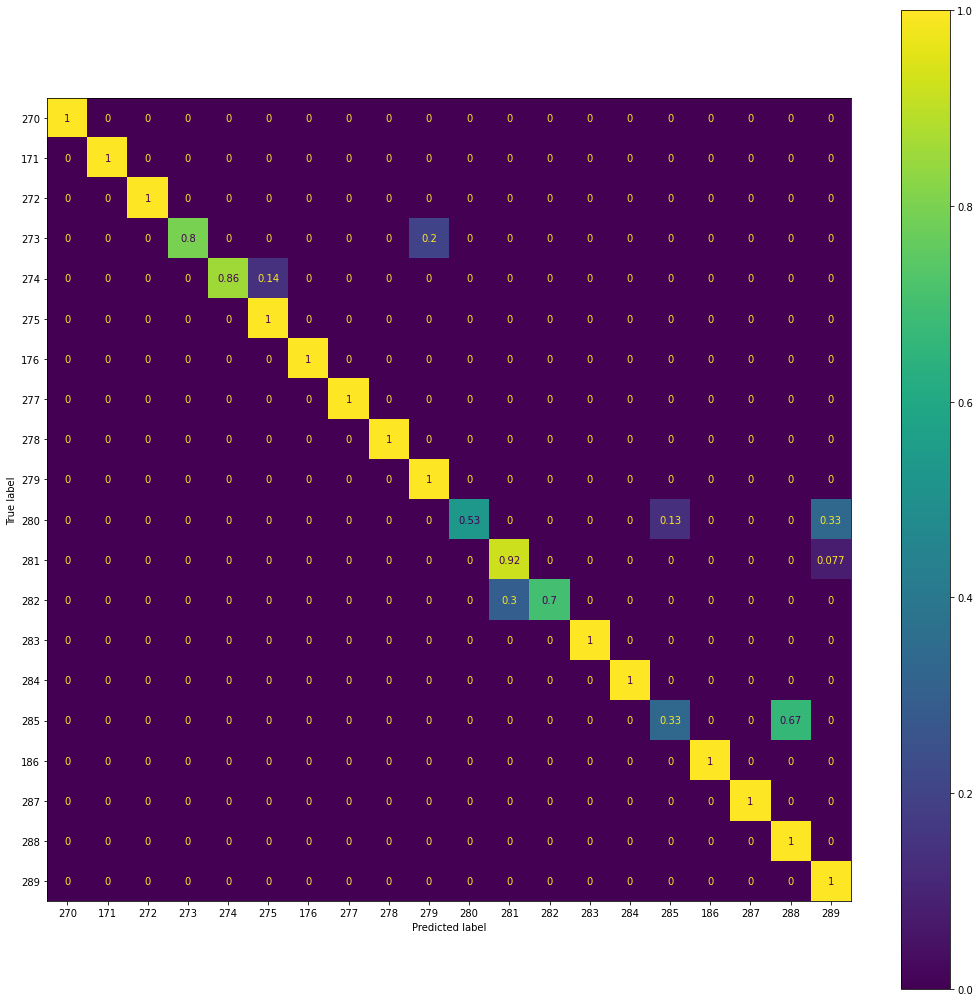

*** Epoch  3  ***
*** Train ***


1876it [00:30, 61.71it/s]

accuracy mean  0.6396588486140725 topk 0.6572494669509595  min  0.6375266524520256
Error  0.3427505330490405
{270: 13, 272: 61, 273: 41, 274: 12, 275: 11, 276: 51, 277: 38, 278: 14, 271: 26, 279: 90, 280: 26, 281: 71, 282: 22, 283: 41, 285: 54, 284: 14, 286: 10, 287: 84, 288: 44, 289: 6}
*** Test ***



258it [00:03, 78.73it/s]


accuracy final_mean  0.8875968992248062  final_min  0.8837209302325582


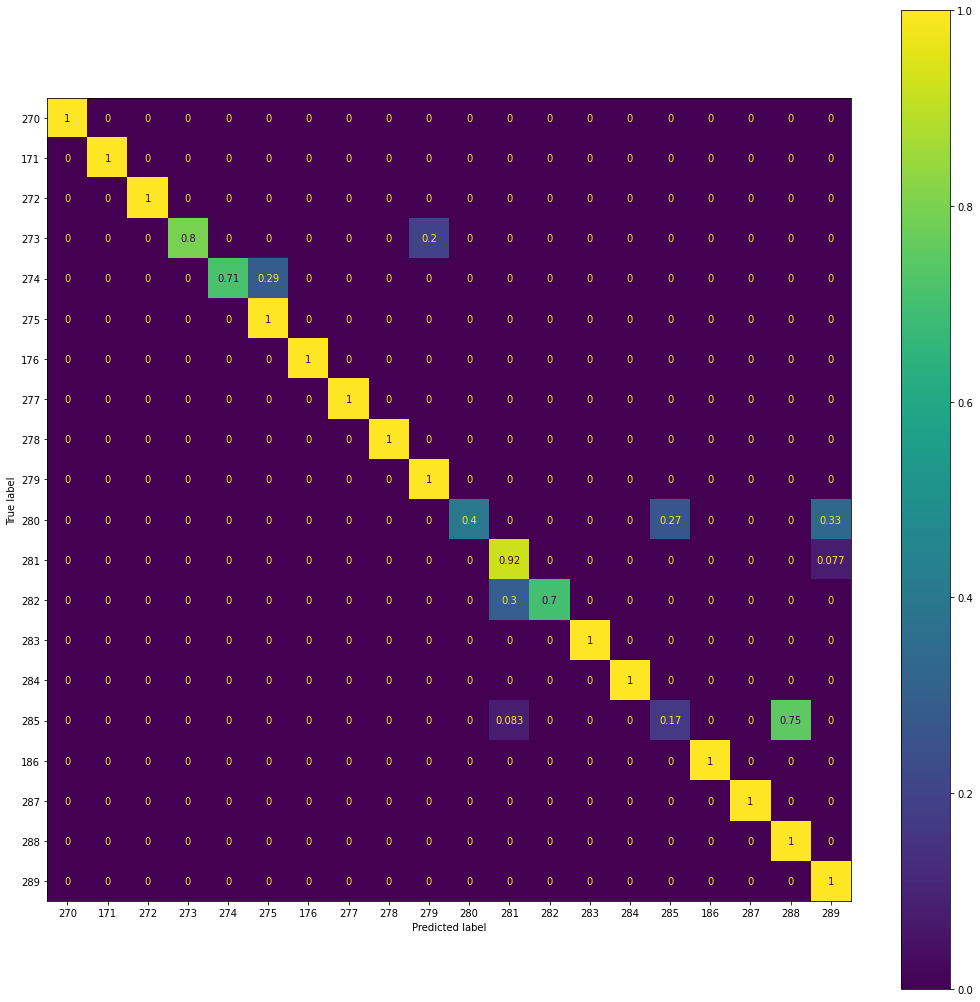

*** Epoch  4  ***
*** Train ***


1876it [00:29, 62.60it/s]

accuracy mean  0.6508528784648188 topk 0.6545842217484008  min  0.6412579957356077
Error  0.34541577825159914
{270: 16, 272: 46, 273: 43, 274: 12, 275: 18, 276: 46, 277: 33, 278: 14, 271: 21, 279: 94, 280: 28, 281: 78, 282: 22, 283: 46, 285: 50, 284: 12, 286: 9, 287: 81, 288: 38, 289: 10}
*** Test ***



258it [00:03, 78.94it/s]


accuracy final_mean  0.8798449612403101  final_min  0.875968992248062


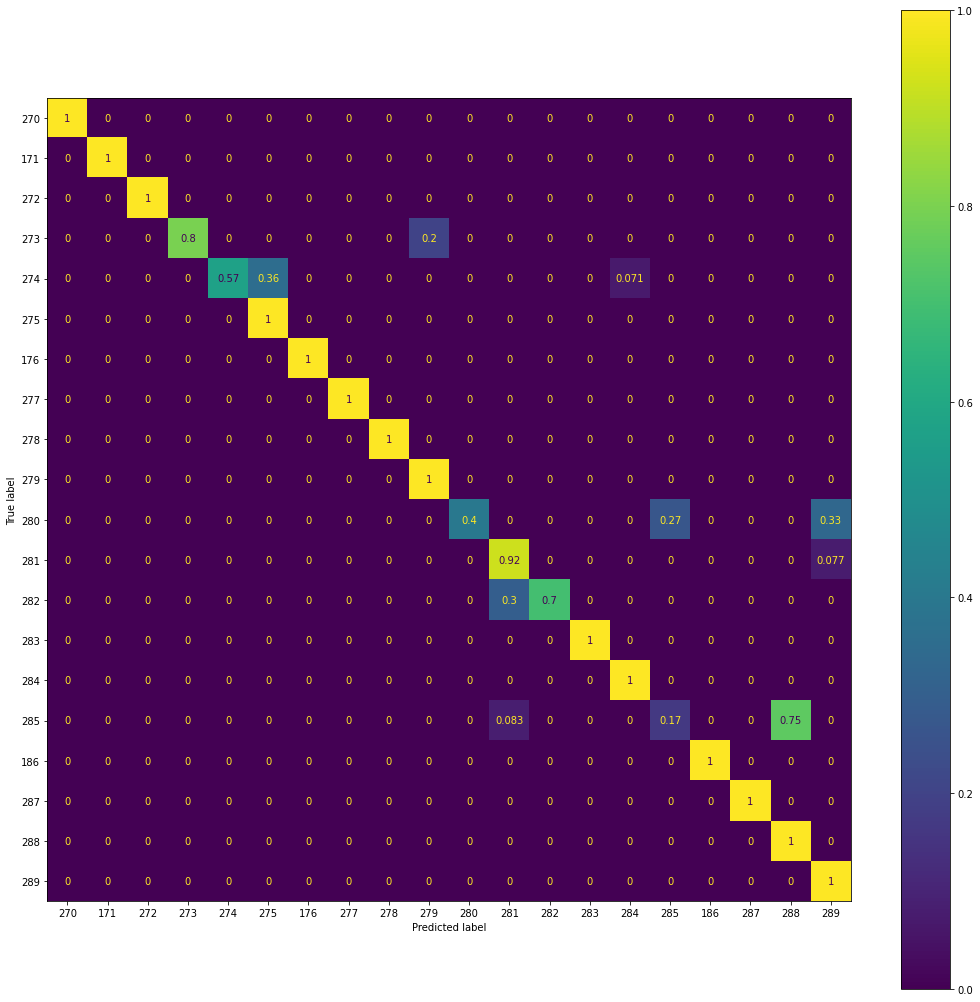

*** Epoch  5  ***
*** Train ***


1876it [00:29, 62.70it/s]

accuracy mean  0.644456289978678 topk 0.6481876332622601  min  0.6508528784648188
Error  0.35181236673773986
{270: 17, 272: 46, 273: 44, 274: 15, 275: 18, 276: 55, 277: 29, 278: 13, 271: 22, 279: 96, 280: 32, 281: 71, 282: 18, 283: 43, 285: 48, 284: 14, 286: 12, 287: 89, 288: 36, 289: 6}
*** Test ***



258it [00:03, 78.98it/s]


accuracy final_mean  0.8604651162790697  final_min  0.8449612403100775


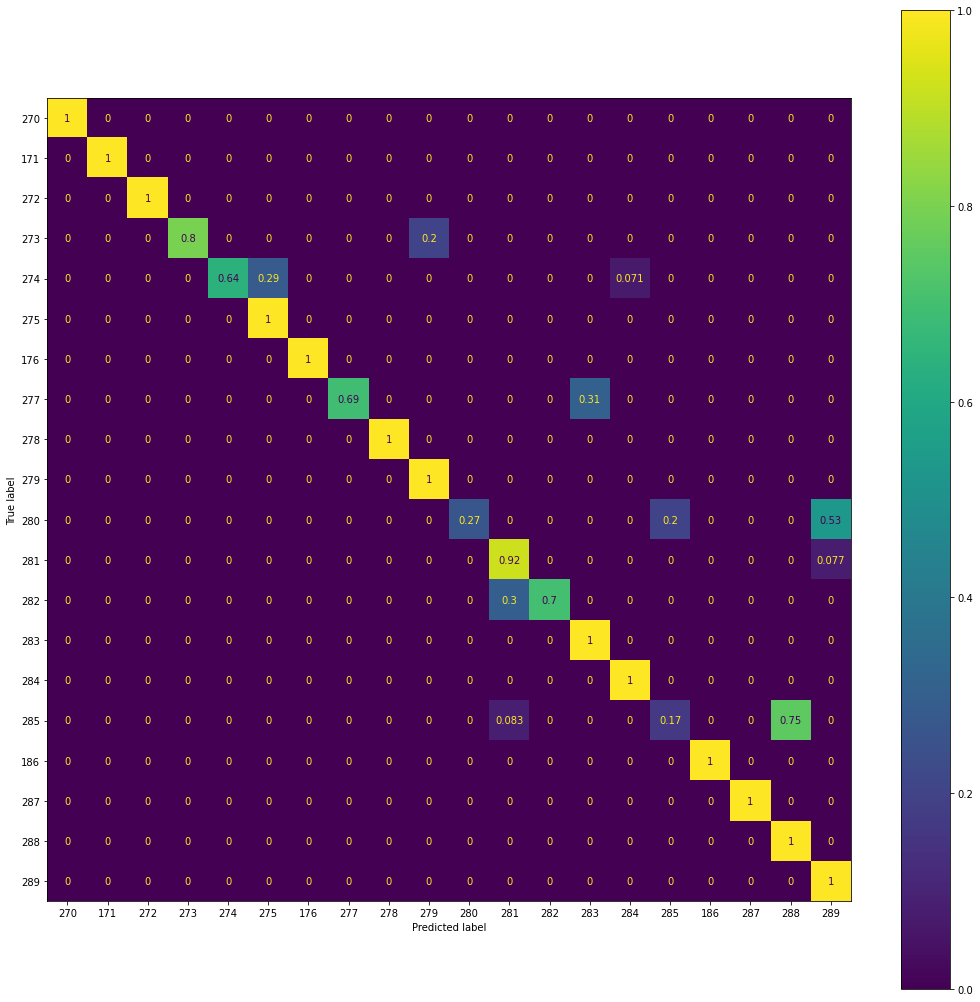

*** Epoch  6  ***
*** Train ***


1876it [00:30, 61.63it/s]

accuracy mean  0.6439232409381663 topk 0.6476545842217484  min  0.6300639658848614
Error  0.3523454157782516
{270: 16, 272: 53, 273: 46, 274: 7, 275: 18, 276: 50, 277: 29, 278: 14, 271: 27, 279: 92, 280: 34, 281: 80, 282: 20, 283: 43, 285: 49, 284: 12, 286: 13, 287: 92, 288: 33, 289: 6}
*** Test ***



258it [00:03, 77.60it/s]


accuracy final_mean  0.8565891472868217  final_min  0.8372093023255814


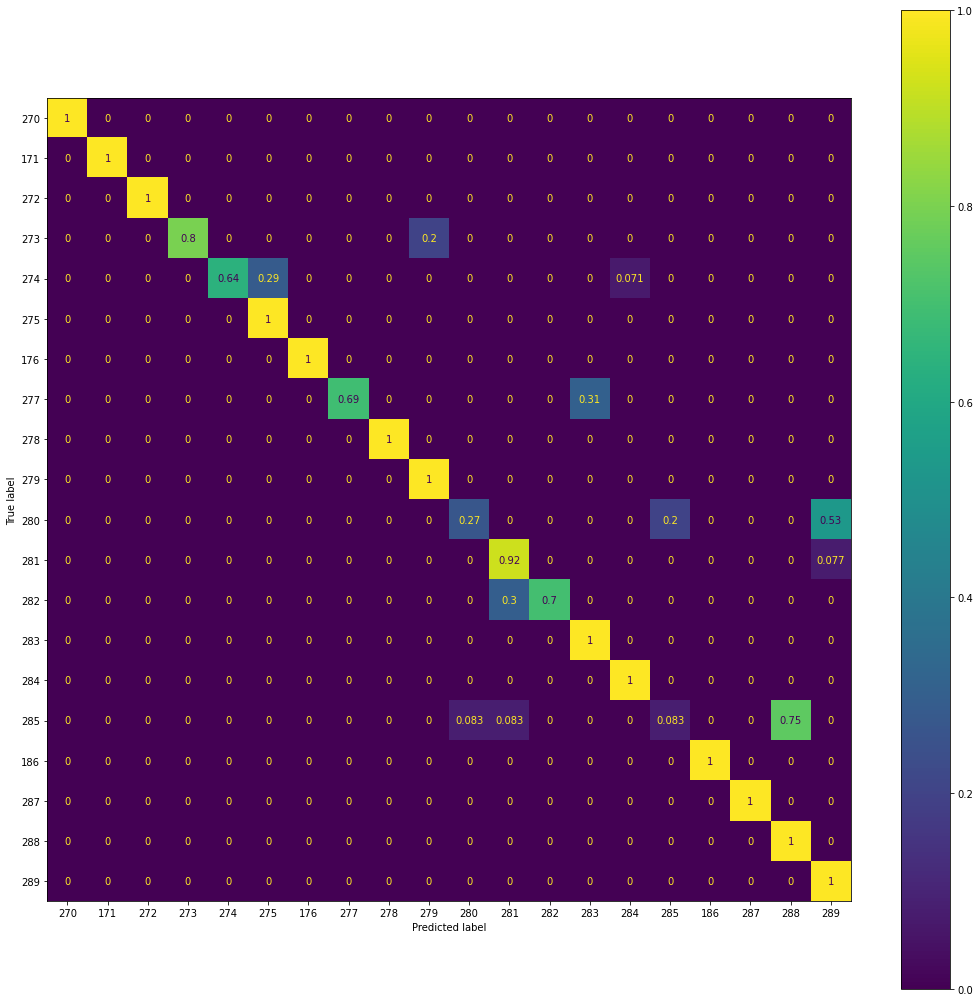

*** Epoch  7  ***
*** Train ***


1876it [00:30, 61.83it/s]

accuracy mean  0.6433901918976546 topk 0.6407249466950959  min  0.6401918976545842
Error  0.35927505330490406
{270: 16, 272: 48, 273: 46, 274: 12, 275: 18, 276: 47, 277: 29, 278: 17, 271: 26, 279: 96, 280: 34, 281: 81, 282: 21, 283: 43, 285: 51, 284: 13, 286: 17, 287: 86, 288: 33, 289: 8}
*** Test ***



258it [00:03, 77.56it/s]


accuracy final_mean  0.8565891472868217  final_min  0.8372093023255814


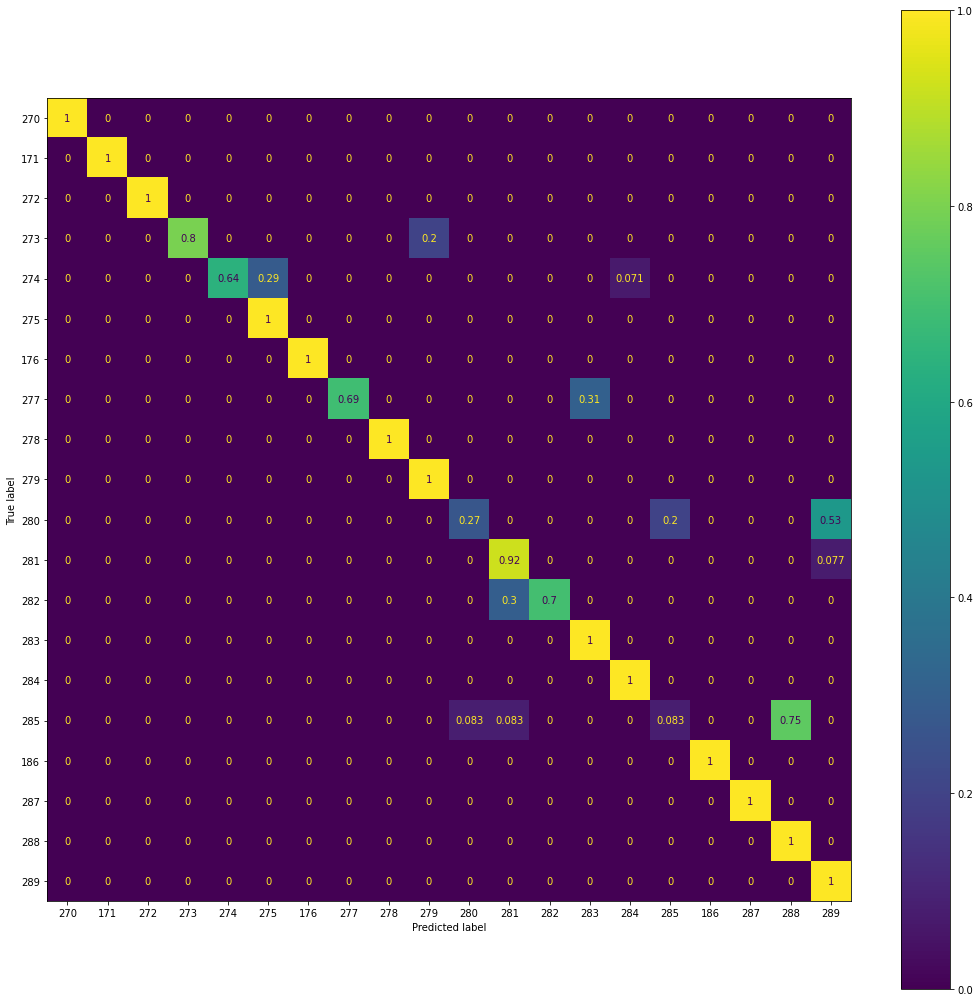

*** Epoch  8  ***
*** Train ***


1876it [00:30, 62.08it/s]

accuracy mean  0.6359275053304904 topk 0.6455223880597015  min  0.6439232409381663
Error  0.35447761194029853
{270: 17, 272: 56, 273: 43, 274: 7, 275: 19, 276: 54, 277: 29, 278: 15, 271: 24, 279: 94, 280: 34, 281: 76, 282: 16, 283: 43, 285: 54, 284: 16, 286: 12, 287: 86, 288: 30, 289: 8}
*** Test ***



258it [00:03, 76.79it/s]


accuracy final_mean  0.8372093023255814  final_min  0.8372093023255814


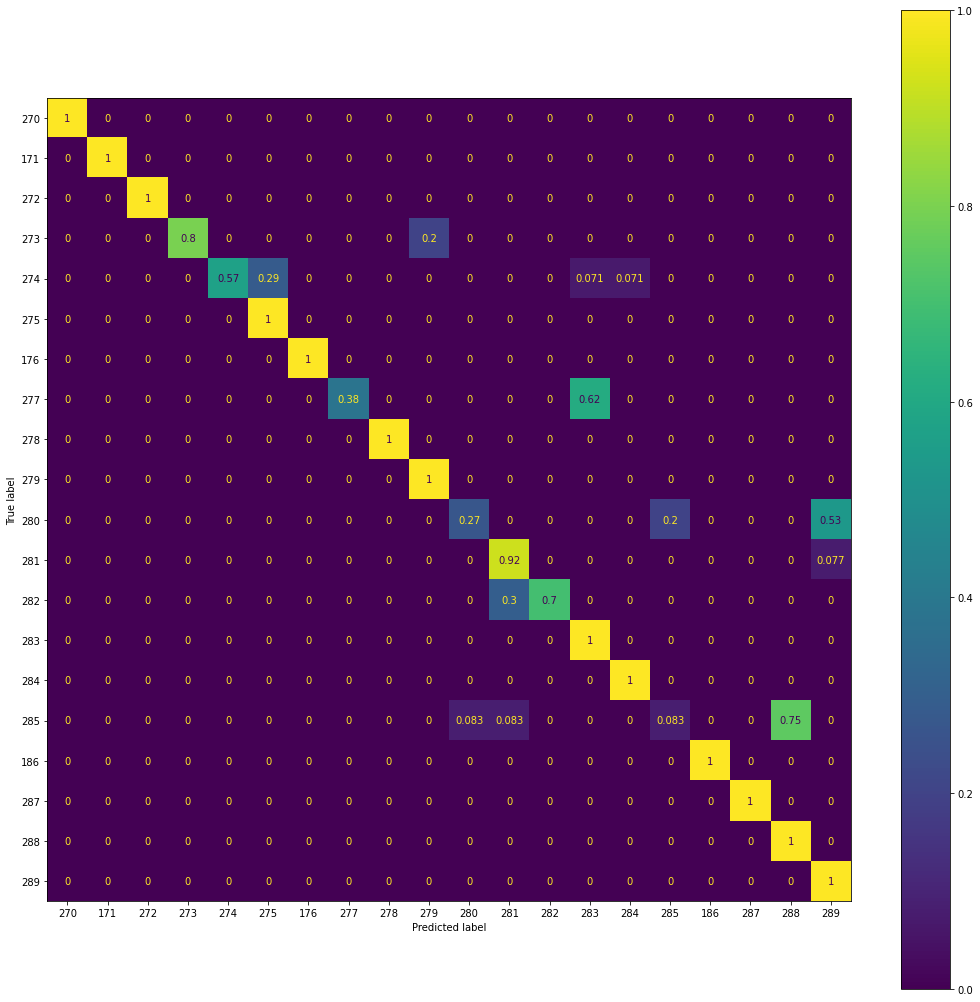

*** Epoch  9  ***
*** Train ***


1876it [00:30, 61.43it/s]

accuracy mean  0.6481876332622601 topk 0.6423240938166311  min  0.6412579957356077
Error  0.35767590618336886
{270: 15, 272: 51, 273: 47, 274: 10, 275: 22, 276: 52, 277: 27, 278: 14, 271: 21, 279: 94, 280: 34, 281: 74, 282: 16, 283: 46, 285: 54, 284: 13, 286: 13, 287: 89, 288: 36, 289: 6}
*** Test ***



258it [00:03, 77.92it/s]


accuracy final_mean  0.8333333333333334  final_min  0.8372093023255814


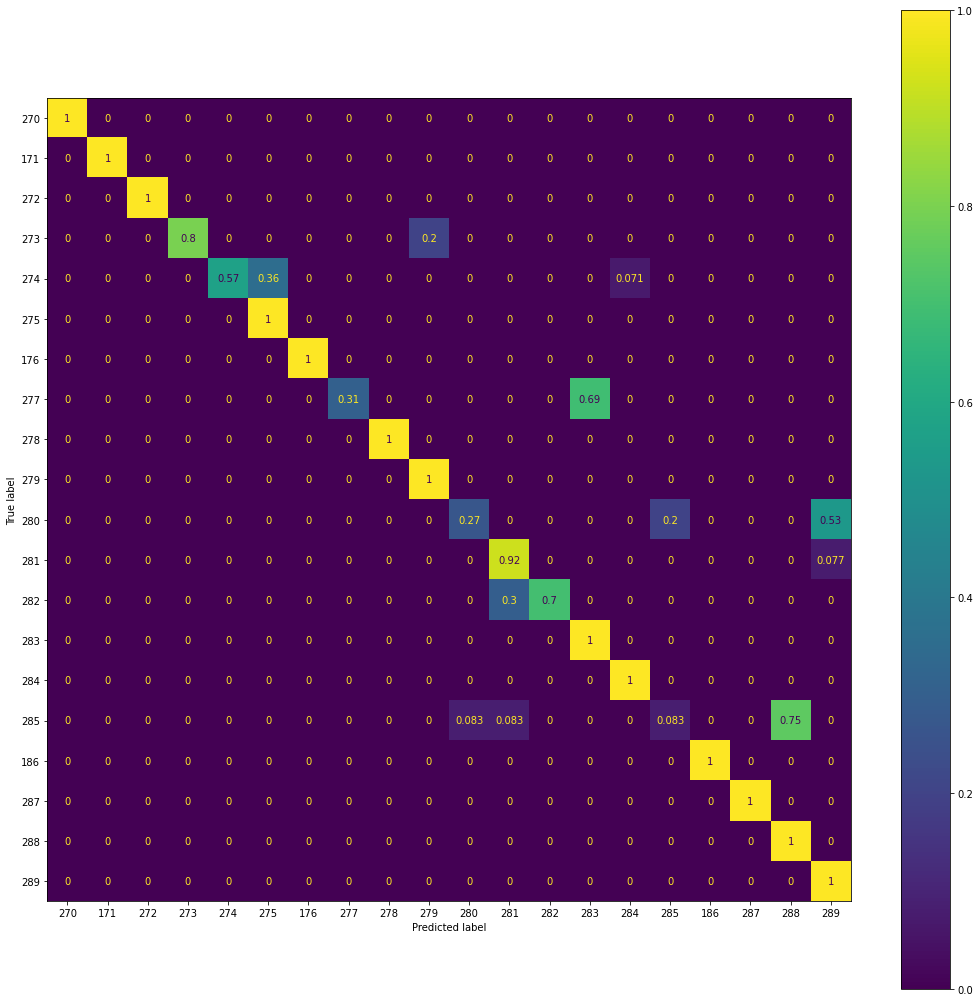

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      # Election day the network need to have the saple and the gold label
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      # Speaker identification network need to have the sample and the place
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
    plt.show()


In [11]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_mean_accuracies), 3))

maximum of min 0.651
maximum of topk 0.664
maximum of mean 0.652
maximum of final mean 0.915
maximum of final min 0.915


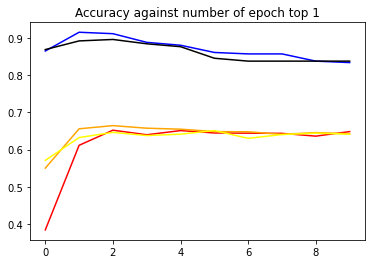

In [12]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')